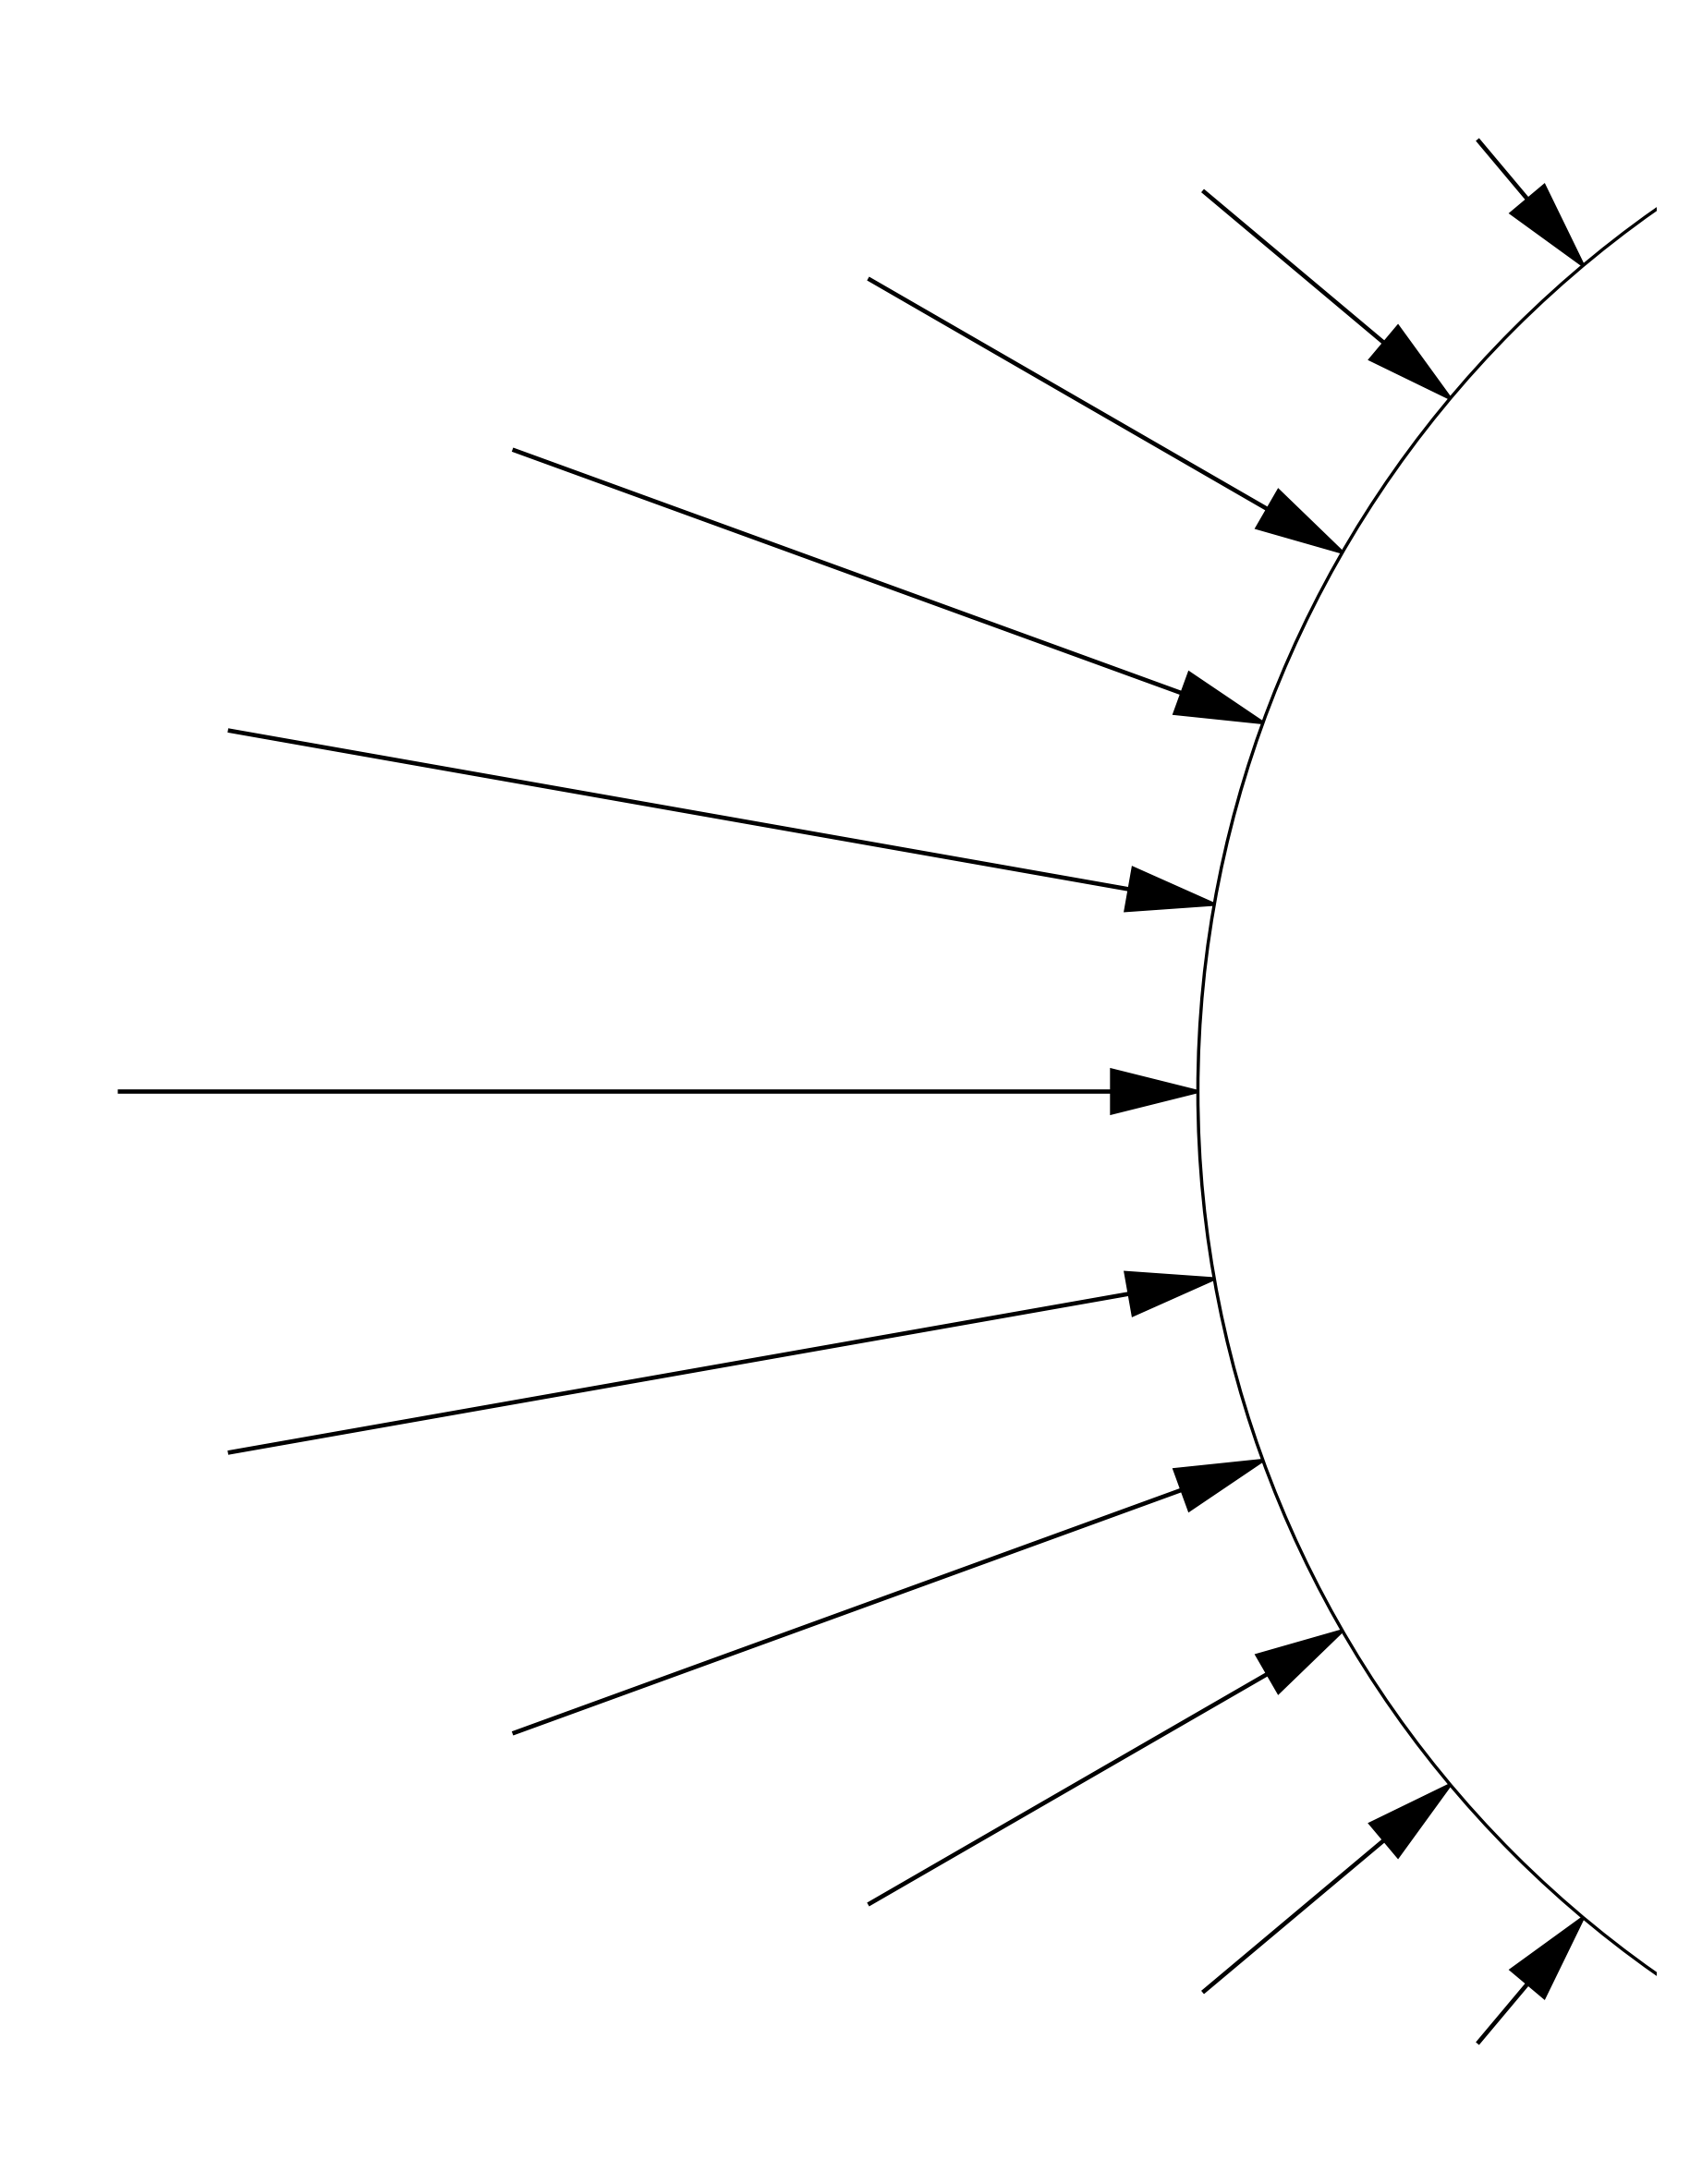

In [58]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6), dpi=500)  # Increased size and resolution

# Parameters
r = 1.0  # radius of the circle
mu = 2 * np.pi / 2    # mean wind direction (270 degrees in radians)
sigma = np.pi / 7    # increased standard deviation (radians)
n_arrows = 36         # number of arrows

# Angles for arrows
angles = np.linspace(0, 2*np.pi, n_arrows, endpoint=False)

# Normalized probabilities for each angle
probs = norm.pdf(angles, loc=mu, scale=sigma)
probs = probs / probs.max()  # normalize to [0, 1]

circle = plt.Circle((0, 0), r, color='k', fill=False, linestyle='-', linewidth=0.5)
ax.add_artist(circle)

offset = 0.00  # how much to move the tip outside the circle

for angle, prob in zip(angles, probs):
    # Move tip slightly outside the circle
    x_tip = (r + offset) * np.cos(angle)
    y_tip = (r + offset) * np.sin(angle)
    length = prob * r
    x_start = (r + length) * np.cos(angle)
    y_start = (r + length) * np.sin(angle)
    if length > 0.1:
        ax.arrow(x_start, y_start, x_tip - x_start, y_tip - y_start,
             head_width=0.04, head_length=0.08, fc='black', ec='black', alpha=1.0, length_includes_head=True,linewidth=0.5)

ax.set_aspect('equal')
ax.axis('off')  # Remove all axis, ticks, and labels

# Ensure the entire circle is visible
#ax.set_xlim(-r - 1.5, r + 0.15)
#ax.set_ylim(-r - 0.4, r + 0.4)

plt.show()
